In [ ]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LogisticRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive (7)/collegePlace.csv')

In [ ]:
df


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [ ]:
df.drop_duplicates()


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2946,23,Male,Information Technology,1,7,1,1,0
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2958,23,Male,Computer Science,0,6,0,1,0


In [ ]:
df.sample(2)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2160,19,Male,Mechanical,0,7,1,0,0
145,23,Male,Civil,0,7,1,0,1


<Axes: xlabel='Gender', ylabel='count'>

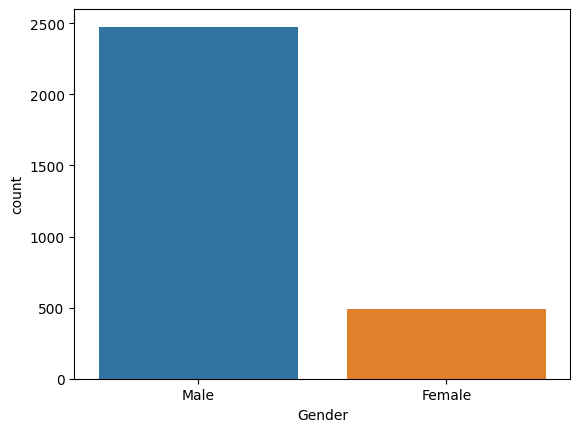

In [ ]:
sns.countplot(x='Gender', data=df)

Text(0.5, 1.0, 'Stream')

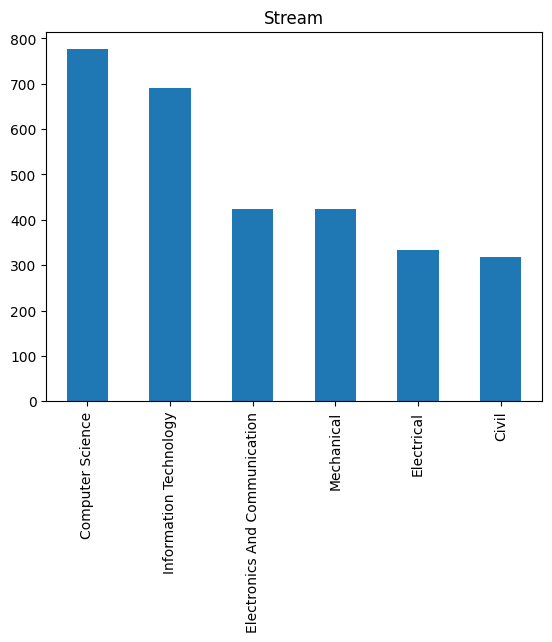

In [ ]:
fig = df ['Stream'].value_counts().plot.bar()
fig.set_title('Stream')

<Axes: xlabel='Stream', ylabel='PlacedOrNot'>

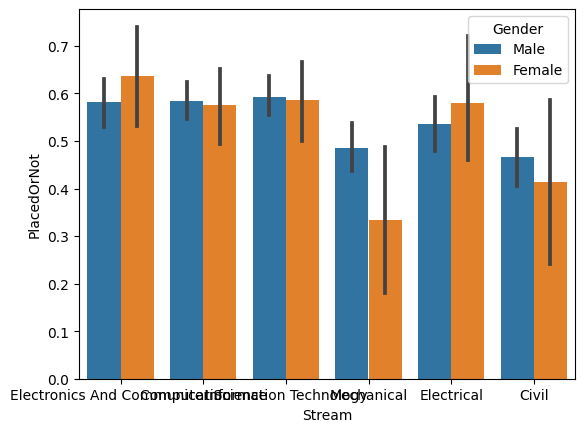

In [ ]:
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender")

In [ ]:
categorical_cols = ['Gender', 'Stream'] 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

array_hot_encoded = ohe.fit_transform(df[categorical_cols])

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

data_other_cols = df.drop(columns=categorical_cols)

data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
y = df.PlacedOrNot
X = df.drop(['PlacedOrNot'],axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2458,19,1,5,1,8,1,0
509,21,1,4,0,7,0,0
1370,21,1,4,0,7,0,1
1352,26,1,1,1,7,0,0
1779,23,1,2,1,8,0,0
...,...,...,...,...,...,...,...
1638,22,1,1,3,8,0,0
1095,22,1,1,1,6,0,0
1130,22,0,0,1,8,0,0
1294,22,1,1,0,7,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[194  86]
 [ 79 235]]
0.7222222222222222
Accuracy: 77.91 %
Standard Deviation: 1.26 %


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred2 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print(accuracy_score(y_test, y_pred2))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[203  77]
 [ 81 233]]
0.734006734006734
Accuracy: 78.67 %
Standard Deviation: 1.36 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
print(accuracy_score(y_test, y_pred3))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[247  33]
 [ 62 252]]
0.8400673400673401
Accuracy: 86.55 %
Standard Deviation: 1.44 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred4 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print(accuracy_score(y_test, y_pred4))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[260  20]
 [ 48 266]]
0.8855218855218855
Accuracy: 87.40 %
Standard Deviation: 1.03 %


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred5 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
print(accuracy_score(y_test, y_pred5))
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[262  18]
 [ 51 263]]
0.8838383838383839


# **Recommendation System**


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Coursera.csv')
df=data.copy()


In [ ]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [ ]:
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [ ]:
df=df[['Course Name','Difficulty Level','Course Description','Skills']]

## **Preprocessing**

In [ ]:
def remove_punctuation(txt):
  txt_nopunt= "".join([c for c in txt if c not in string.punctuation])
  return txt_nopunt

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Course Description'] = df['Course Description'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
df['Course Description']=df['Course Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Course Name']=df['Course Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Skills']=df['Skills'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df['Course Name']=df['Course Name'].replace(","," ",regex=True)
df['Course Description']=df['Course Description'].replace(","," ",regex=True)
df['Skills']=df['Skills'].replace(","," ",regex=True)
df['Skills']=df['Skills'].replace("-"," ",regex=True)

df['Course Name']=df['Course Name'].apply(lambda x: remove_punctuation(x))
df['Course Description']=df['Course Description'].apply(lambda x: remove_punctuation(x))
df['Skills']=df['Skills'].apply(lambda x: remove_punctuation(x))

df['Course Description']=df['Course Description'].replace("�","'",regex=True)

df['tags']=df['Course Name']+' '+ df['Difficulty Level']+' '+ df['Course Description']+' '+df['Skills']
new_df=df[['Course Name','tags']]

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [ ]:
new_df['tags']=new_df['tags'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
new_df['tags'][0]

'write feature length screenplay film television beginner write full length feature film script course write complete featurelength screenplay film television serious drama romantic comedy anything learn break creative process components discover structured process allows produce polished pitchready script end course completing project increase confidence ideas abilities feel prepared pitch first script get started next course designed tap creativity based active learning actual learning takes place within activities writing learn link trailer course view trailer please copy paste link browser learner review love approach professor wheeler takes towards course point easy follow informative would definitely recommend anyone interested taking screenplay writing course course curriculum simple adopt professional writers room process write post work peer review share feedback peers revise work feedback receive peers thats real world feel professional writers room yet prior experience write

In [ ]:
ps=PorterStemmer()

In [ ]:
def stem(text):
  y=[]
  
  for i in text.split():
    y.append(ps.stem(i))
  
  return " ".join(y)

In [ ]:
new_df['tags']=new_df['tags'].apply(stem)

In [ ]:
new_df['tags'][0]

'write featur length screenplay film televis beginn write full length featur film script cours write complet featurelength screenplay film televis seriou drama romant comedi anyth learn break creativ process compon discov structur process allow produc polish pitchreadi script end cours complet project increas confid idea abil feel prepar pitch first script get start next cours design tap creativ base activ learn actual learn take place within activ write learn link trailer cours view trailer pleas copi past link browser learner review love approach professor wheeler take toward cours point easi follow inform would definit recommend anyon interest take screenplay write cours cours curriculum simpl adopt profession writer room process write post work peer review share feedback peer revis work feedback receiv peer that real world feel profession writer room yet prior experi writer requir im propon experienti learn activ learn lectur short sometim two minut long point design stepbystep pro

**Text** **Vectorization**

In [ ]:
cv=CountVectorizer()

In [ ]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [ ]:
similarity=cosine_similarity(vectors)

In [ ]:
display(new_df)

,Course Name,tags
0,Write A Feature Length Screenplay For Film Or ...,write featur length screenplay film televis be...
1,Business Strategy Business Model Canvas Analys...,busi strategi busi model canva analysi miro be...
2,Silicon Thin Film Solar Cells,silicon thin film solar cell advanc cours cons...
3,Finance Managers,financ manag intermedi come number alway meet ...
4,Retrieve Data using SingleTable SQL Queries,retriev data use singlet sql queri beginn cour...
...,...,...
3517,Capstone Retrieving Processing Visualizing D...,capston retriev process visual data python beg...
3518,Patrick Henry Forgotten Founder,patrick henri forgotten founder intermedi 'giv...
3519,Business intelligence data analytics Generate ...,busi intellig data analyt gener insight advanc...
3520,Rigid Body Dynamics,rigid bodi dynam beginn cours teach dynam one ...


In [ ]:
def recommend(course):
  course_index=new_df[new_df['Course Name']==course].first_valid_index()
  distances=similarity[course_index]
  dict={}
  for i in range(0,len(new_df['tags'])):
    dict[i]=distances[i]
  dict=sorted(dict.items(),key=lambda x:x[1], reverse=True)
  for i in range(1,7):
    index=dict[i][0]
    print(new_df['Course Name'][index])

In [ ]:
recommend('Retrieve Data using SingleTable SQL Queries')

Creating Database Tables SQL
Advanced SQL Retrieval Queries SQLiteStudio
Create Relational Database Tables Using SQLiteStudio
Manipulating Data SQL
Databases SQL Data Science
Databases SQL Data Science


In [ ]:
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(df['tags'])

In [ ]:
similarity=cosine_similarity(tfidf_matrix)

In [ ]:
recommend('Retrieve Data using SingleTable SQL Queries')

Creating Database Tables SQL
Manipulating Data SQL
Advanced Relational Database SQL
Create Relational Database Tables Using SQLiteStudio
Intermediate Relational Database SQL
Advanced SQL Retrieval Queries SQLiteStudio


In [ ]:
coursera=pd.read_csv("/content/drive/MyDrive/Coursera.csv")
coursera = pd.DataFrame(coursera)

In [ ]:
coursera.describe(include=['object']).T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course URL,3522,3424,https://www.coursera.org/learn/gcp-fundamentals,8
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


In [ ]:
coursera_new=coursera.copy()

In [ ]:
coursera.rename(columns = {'course_Certificate_type':'Certficate type'}, inplace = True)

coursera

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


In [ ]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Coursera.csv")
data = pd.DataFrame(data)

In [ ]:
data.head

<bound method NDFrame.head of                                             Course Name  \
0     Write A Feature Length Screenplay For Film Or ...   
1     Business Strategy: Business Model Canvas Analy...   
2                         Silicon Thin Film Solar Cells   
3                                  Finance for Managers   
4          Retrieve Data using Single-Table SQL Queries   
...                                                 ...   
3517  Capstone: Retrieving, Processing, and Visualiz...   
3518                   Patrick Henry: Forgotten Founder   
3519  Business intelligence and data analytics: Gene...   
3520                                Rigid Body Dynamics   
3521  Architecting with Google Kubernetes Engine: Pr...   

                                             University Difficulty Level  \
0                             Michigan State University         Beginner   
1                              Coursera Project Network         Beginner   
2                                

In [ ]:
data.describe(include=['object']).T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course URL,3522,3424,https://www.coursera.org/learn/gcp-fundamentals,8
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


In [ ]:
data.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [ ]:
data.isnull()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3517,False,False,False,False,False,False,False
3518,False,False,False,False,False,False,False
3519,False,False,False,False,False,False,False
3520,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum() 

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [ ]:
data['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [ ]:
data['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [ ]:
data = data[['Course Name','Difficulty Level','Course Description','Skills']]

In [ ]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [ ]:
data['Course Name'] = data['Course Name'].str.replace(' ',',')
data['Course Name'] = data['Course Name'].str.replace(',,',',')
data['Course Name'] = data['Course Name'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace(' ',',')
data['Course Description'] = data['Course Description'].str.replace(',,',',')
data['Course Description'] = data['Course Description'].str.replace('_','')
data['Course Description'] = data['Course Description'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace('(','')
data['Course Description'] = data['Course Description'].str.replace(')','')

#removing paranthesis from skills columns 
data['Skills'] = data['Skills'].str.replace('(','')
data['Skills'] = data['Skills'].str.replace(')','')

<ipython-input-14-99c096756b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Name'] = data['Course Name'].str.replace(' ',',')
<ipython-input-14-99c096756b38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Course Name'] = data['Course Name'].str.replace(',,',',')
<ipython-input-14-99c096756b38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...


In [ ]:
data['tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']

<ipython-input-16-305f08a1e1b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['Course Name'] + data['Difficulty Level'] + data['Course Description'] + data['Skills']


In [ ]:
data.head(5)

,Course Name,Difficulty Level,Course Description,Skills,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...,"Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...,"Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...,"Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...,"Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...,"Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [ ]:
data['tags'].iloc[1]

'Business,Strategy,Business,Model,Canvas,Analysis,with,MiroBeginnerBy,the,end,of,this,guided,project,you,will,be,fluent,in,identifying,and,creating,Business,Model,Canvas,solutions,based,on,previous,high-level,analyses,and,research,data.,This,will,enable,you,to,identify,and,map,the,elements,required,for,new,products,and,services.,Furthermore,it,is,essential,for,generating,positive,results,for,your,business,venture.,This,guided,project,is,designed,to,engage,and,harness,your,visionary,and,exploratory,abilities.,You,will,use,proven,models,in,strategy,and,product,development,with,the,Miro,platform,to,explore,and,analyse,your,business,propositions.,,We,will,practice,critically,examining,results,from,previous,analysis,and,research,results,in,deriving,the,values,for,each,of,the,business,model,sections.Finance  business plan  persona user experience  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

In [ ]:
new_df = data[['Course Name','tags']]

In [ ]:
new_df.head(5)

,Course Name,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers","Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [ ]:
new_df['tags'] = data['tags'].str.replace(',',' ')

<ipython-input-21-afdec3ca82bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = data['tags'].str.replace(',',' ')


In [ ]:
new_df['Course Name'] = data['Course Name'].str.replace(',',' ')

<ipython-input-22-6e793e9fa086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = data['Course Name'].str.replace(',',' ')


In [ ]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-23-eb11195f33c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)
<ipython-input-23-eb11195f33c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:
new_df.head(5)

,course_name,tags
0,Write A Feature Length Screenplay For Film Or ...,write a feature length screenplay for film or ...
1,Business Strategy Business Model Canvas Analys...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,silicon thin film solar cellsadvancedthis cour...
3,Finance for Managers,finance for managersintermediatewhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,retrieve data using single-table sql queriesbe...


In [ ]:
new_df.shape

(3522, 2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=5000,stop_words='english')
vectors = cv.fit_transform(new_df['tags']).toarray()

In [ ]:
import nltk

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#defining the stemming function
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stem)

<ipython-input-30-be18a4346d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vectors)

In [1]:
def recommend(course):
    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]
    
    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

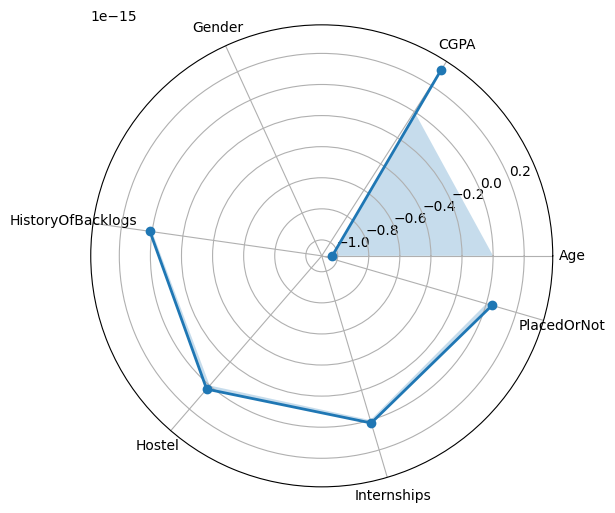

In [ ]:
df_norm = (df - df.mean()) / df.std()

# Calculate the mean values of all features
means = df_norm.mean()

# Plot a radar chart of the mean values of all features
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(means.index, means.values, 'o-', linewidth=2)
ax.fill_between(means.index, means.values, alpha=0.25)
plt.show()

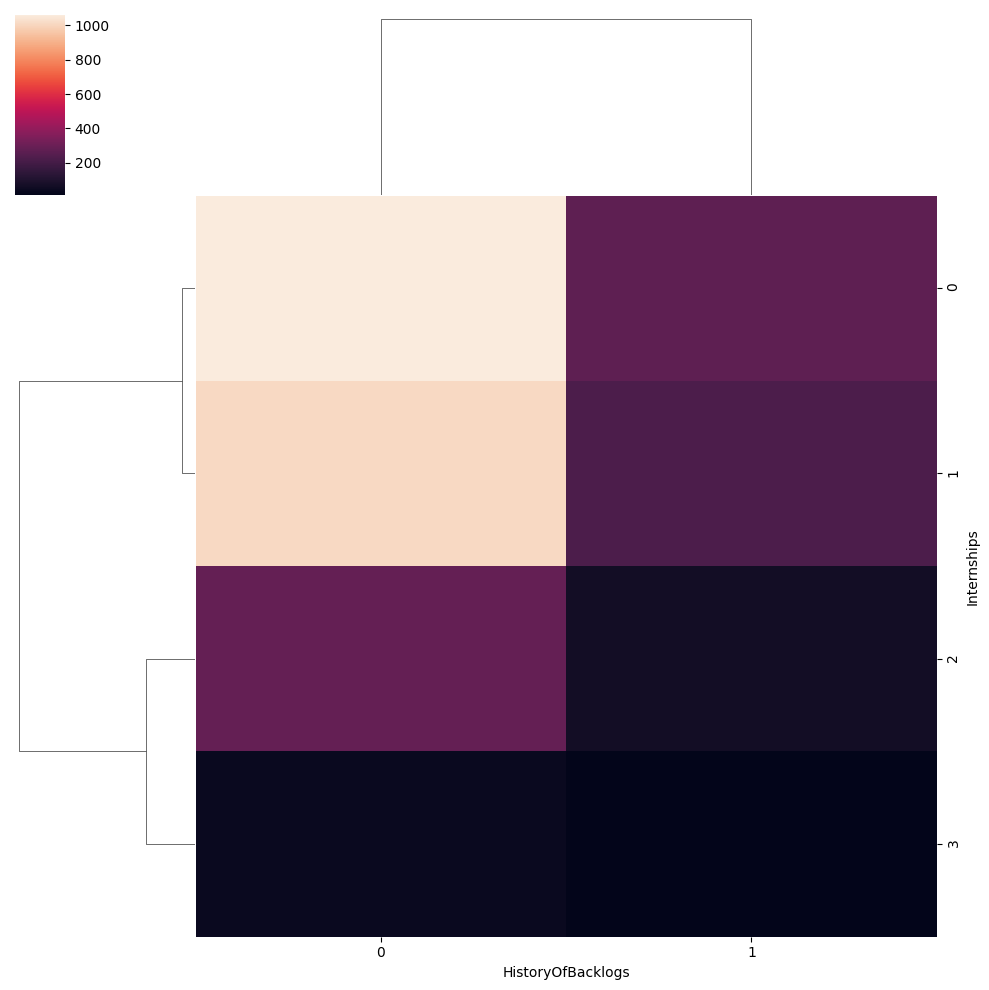

In [ ]:
sns.clustermap(pd.crosstab(df['Internships'],df['HistoryOfBacklogs']))

<Axes: >

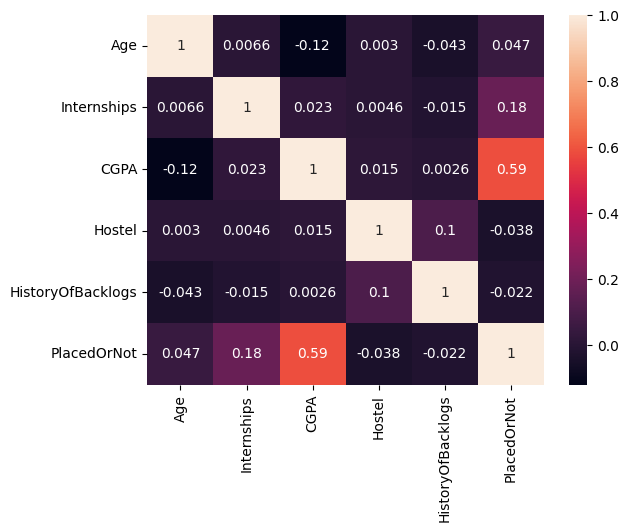

In [ ]:
corr_matrix = df.corr()

# Plot a heat map of the correlation matrix
sns.heatmap(corr_matrix, annot=True)